# Autocorrélation spatiale
Reproduction avec R l'essentiel d'une analyse menée avec Geoda.

-/-/- - Author: Abdoulaye DIALLO  
-/-/- - École: ENSAI  
-/-/- - Cours: Spatial Data  

### Sources et Références
### [Spatial Econometrics housing-prices](https://rpubs.com/eosowska/housing-prices)  
### [Contiguity-Based Spatial Weights](https://geodacenter.github.io/workbook/4a_contig_weights/lab4a.html)

----------------------------

In [1]:
options(warn=-1)
library(spgwr)
library(tmap)
library(ggplot2) # for the mapping tools library(sf)
library(tibble)
library(GISTools)
library(rgdal)
library(grid)
library(spdep)

Loading required package: sp

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

NOTE: This package does not constitute approval of GWR
as a method of spatial analysis; see example(gwr)

Loading required package: maptools

Checking rgeos availability: TRUE

Loading required package: RColorBrewer

Loading required package: MASS

Loading required package: rgeos

rgeos version: 0.5-5, (SVN revision 640)
 GEOS runtime version: 3.8.1-CAPI-1.13.3 
 Linking to sp version: 1.4-2 
 Polygon checking: TRUE 


rgdal: version: 1.5-18, (SVN revision 1082)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.1.4, released 2020/10/20
Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/4.0/Resources/library/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, Feb

In [3]:
# Load the data. You may need to alter the file directory
housingmedian = read.csv("housingmedian.csv")

In [5]:
# data type de la base
str(housingmedian)

'data.frame':	310 obs. of  14 variables:
 $ GEO_ID    : chr  "1400000US25017300100" "1400000US25017301101" "1400000US25017301102" "1400000US25017310100" ...
 $ STATE     : int  25 25 25 25 25 25 25 25 25 25 ...
 $ COUNTY    : int  17 17 17 17 17 17 17 17 17 17 ...
 $ POLY_ID   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ TRACT     : int  300100 301101 301102 310100 310200 310300 310400 310500 310601 310602 ...
 $ NAME      : num  3001 3011 3011 3101 3102 ...
 $ LSAD      : chr  "Tract" "Tract" "Tract" "Tract" ...
 $ SHAPE_AREA: num  1.15e+08 8.25e+07 7.59e+07 2.05e+06 3.81e+06 ...
 $ SHAPE_LEN : num  48106 41749 37793 7503 8974 ...
 $ Id        : chr  "1400000US25017300100" "1400000US25017301101" "1400000US25017301102" "1400000US25017310100" ...
 $ Id2       : num  2.5e+10 2.5e+10 2.5e+10 2.5e+10 2.5e+10 ...
 $ Geography : chr  "Census Tract 3001, Middlesex County, Massachusetts" "Census Tract 3011.01, Middlesex County, Massachusetts" "Census Tract 3011.02, Middlesex County, Massachusetts" "Cens

In [6]:
# data head
housingmedian

GEO_ID               STATE COUNTY POLY_ID TRACT  NAME    LSAD  SHAPE_AREA 
1   1400000US25017300100 25    17      1      300100 3001.00 Tract 115348429.9
2   1400000US25017301101 25    17      2      301101 3011.01 Tract  82527314.7
3   1400000US25017301102 25    17      3      301102 3011.02 Tract  75895483.8
4   1400000US25017310100 25    17      4      310100 3101.00 Tract   2048994.3
5   1400000US25017310200 25    17      5      310200 3102.00 Tract   3807671.4
6   1400000US25017310300 25    17      6      310300 3103.00 Tract   2010769.2
7   1400000US25017310400 25    17      7      310400 3104.00 Tract   1261638.0
8   1400000US25017310500 25    17      8      310500 3105.00 Tract   1755350.0
9   1400000US25017310601 25    17      9      310601 3106.01 Tract   9968317.7
10  1400000US25017310602 25    17     10      310602 3106.02 Tract   4635625.6
11  1400000US25017310700 25    17     11      310700 3107.00 Tract   2143012.1
12  1400000US25017311100 25    17     12      311100 3111.00 Tract    790003.0
13  1400000US25017311200 25    17     13      311200 3112.00 Tract    854380.3
14  1400000US25017311300 25    17     14      311300 3113.00 Tract   1180738.9
15  1400000US25017311400 25    17     15      311400 3114.00 Tract   4473827.1
16  1400000US25017311500 25    17     16      311500 3115.00 Tract   1015933.6
17  1400000US25017311600 25    17     17      311600 3116.00 Tract   6579387.0
18  1400000US25017311700 25    17     18      311700 3117.00 Tract   1395997.9
19  1400000US25017311800 25    17     19      311800 3118.00 Tract   1105283.4
20  1400000US25017311900 25    17     20      311900 3119.00 Tract    847930.3
21  1400000US25017312000 25    17     21      312000 3120.00 Tract    668022.7
22  1400000US25017312100 25    17     22      312100 3121.00 Tract   1297538.3
23  1400000US25017312200 25    17     23      312200 3122.00 Tract   5562137.2
24  1400000US25017312300 25    17     24      312300 3123.00 Tract   6057713.9
25  1400000US25017312400 25    17     25      312400 3124.00 Tract    830180.8
26  1400000US25017312501 25    17     26      312501 3125.01 Tract   3923246.9
27  1400000US25017312502 25    17     27      312502 3125.02 Tract   3711417.0
28  1400000US25017313101 25    17     28      313101 3131.01 Tract  56614536.3
29  1400000US25017313102 25    17     29      313102 3131.02 Tract  30261942.2
30  1400000US25017314101 25    17     30      314101 3141.01 Tract  16048836.6
⋮   ⋮                    ⋮     ⋮      ⋮       ⋮      ⋮       ⋮     ⋮          
281 1400000US25017382200 25    17     281     382200 3822.00 Tract  8145202   
282 1400000US25017382300 25    17     282     382300 3823.00 Tract 24210167   
283 1400000US25017382400 25    17     283     382400 3824.00 Tract  8982294   
284 1400000US25017382500 25    17     284     382500 3825.00 Tract 12250512   
285 1400000US25017382601 25    17     285     382601 3826.01 Tract  3407686   
286 1400000US25017382602 25    17     286     382602 3826.02 Tract  7617938   
287 1400000US25017383101 25    17     287     383101 3831.01 Tract  5149695   
288 1400000US25017383102 25    17     288     383102 3831.02 Tract  2165382   
289 1400000US25017383200 25    17     289     383200 3832.00 Tract  4959835   
290 1400000US25017383300 25    17     290     383300 3833.00 Tract  6984152   
291 1400000US25017383400 25    17     291     383400 3834.00 Tract  3656923   
292 1400000US25017383501 25    17     292     383501 3835.01 Tract  3908269   
293 1400000US25017383502 25    17     293     383502 3835.02 Tract  3316704   
294 1400000US25017383600 25    17     294     383600 3836.00 Tract 11487146   
295 1400000US25017383700 25    17     295     383700 3837.00 Tract  8520673   
296 1400000US25017383800 25    17     296     383800 3838.00 Tract 10118446   
297 1400000US25017383901 25    17     297     383901 3839.01 Tract 24916492   
298 1400000US25017383902 25    17     298     383902 3839.02 Tract 20945170   
299 1400000US25017384001 25    17     299     384001 3

In [13]:
list.files('Camden_oa11/', pattern='\\.shp$')

[1] "Camden_oa11.shp"

In [14]:
library("rgeos")
library(raster)


Attaching package: ‘raster’


The following objects are masked from ‘package:MASS’:

    area, select




In [16]:
# Load the output area shapefiles
s <- shapefile("Camden_oa11/Camden_oa11.shp")

In [19]:
housing.areas <- readOGR("Camden_oa11/", "Camden_oa11")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/abdoulayediallo/Documents/Documents – MacPro/ENSAI/Cours/econometrie_spatial/tp/spatial-econometrics/Camden_oa11", layer: "Camden_oa11"
with 749 features
It has 1 fields


In [20]:
housing.areas

class       : SpatialPolygonsDataFrame 
features    : 749 
extent      : 523954.5, 531554.9, 180959.8, 187603.6  (xmin, xmax, ymin, ymax)
crs         : +proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=400000 +y_0=-100000 +ellps=airy +units=m +no_defs 
variables   : 1
names       :    OA11CD 
min values  : E00004120 
max values  : E00174680 

In [29]:
# join our census data to the shapefile
OA.Census <- merge(housing.areas, housingmedian, by.x="OA11CD", by.y="GEO_ID")

In [30]:
OA.Census_sf <- st_as_sf(OA.Census)

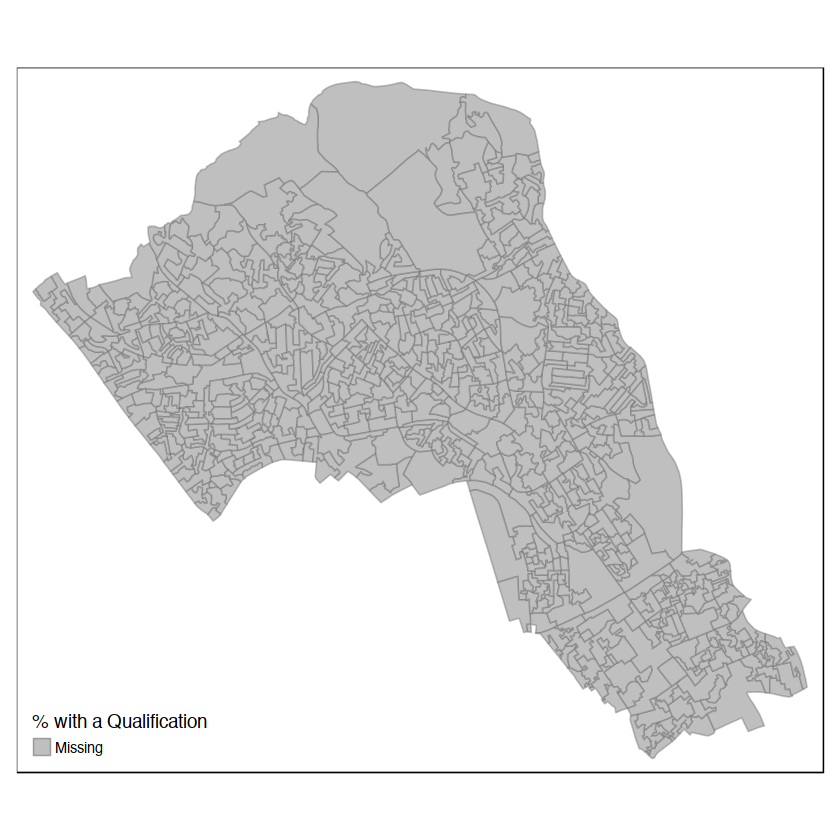

In [31]:
library("tmap")
tm_shape(OA.Census_sf) + tm_fill("Median_val", palette = "Reds", style = "quantile", title =
"% with a Qualification") + tm_borders(alpha=.4)

In [33]:
# Calculate neighbours
neighbours <- poly2nb(OA.Census)
neighbours

Neighbour list object:
Number of regions: 749 
Number of nonzero links: 4342 
Percentage nonzero weights: 0.7739737 
Average number of links: 5.797063 

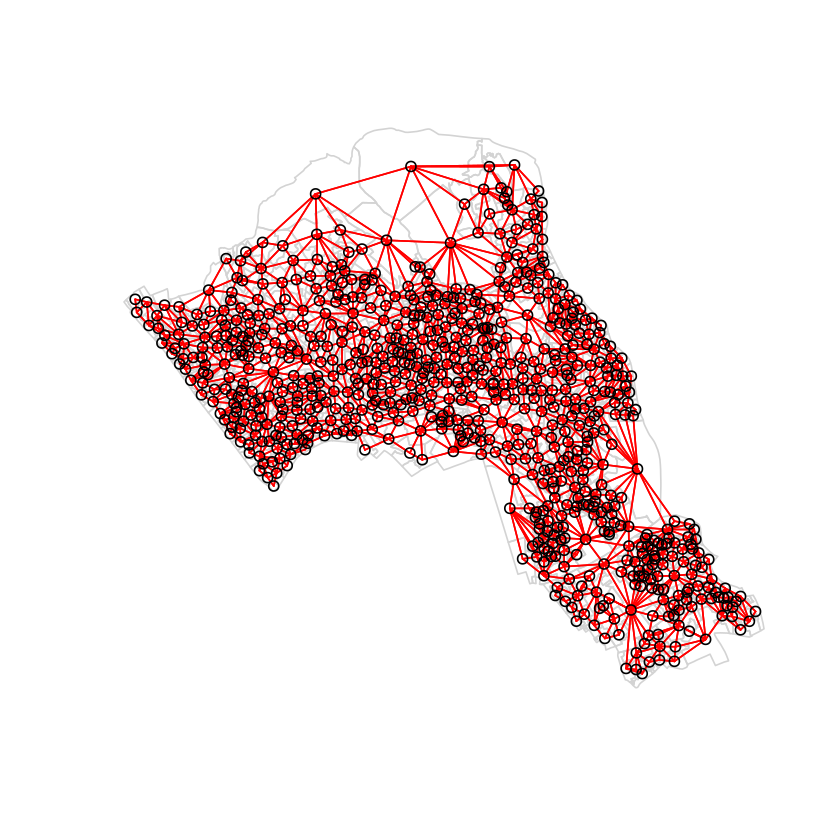

In [34]:
plot(OA.Census, border = 'lightgrey')
plot(neighbours, coordinates(OA.Census), add=TRUE, col='red')

In [35]:
# Calculate the Rook's case neighbours
neighbours2 <- poly2nb(OA.Census, queen = FALSE)
neighbours2

Neighbour list object:
Number of regions: 749 
Number of nonzero links: 4176 
Percentage nonzero weights: 0.7443837 
Average number of links: 5.575434 

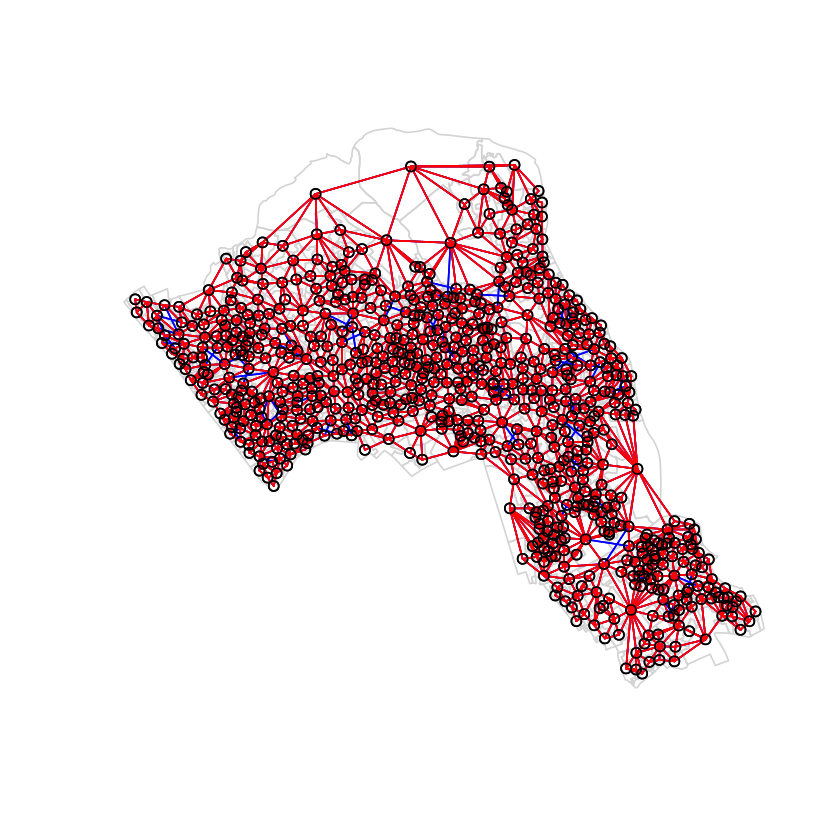

In [36]:
# compares different types of neighbours
plot(OA.Census, border = 'lightgrey')
plot(neighbours, coordinates(OA.Census), add=TRUE, col='blue')
plot(neighbours2, coordinates(OA.Census), add=TRUE, col='red')